In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
one_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/AI_chatBot.csv')
two_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/AI_speaker.csv')
three_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/studio.csv')
four_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_collection_tool.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
all_df = pd.concat([one_df, two_df, three_df, four_df])
all_df.reset_index(drop = True, inplace = True)

In [ ]:
all_df.head()

,Unnamed: 0,sentence,Id,fileNm,recrdTime,recrdQuality,recrdDt,scriptSetNo,recrdEnvrn,colctUnitCode,cityCode,recrdUnit,convrsThema,gender,recorderId,age
0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서,노인대화-08580,노인남여_노인대화07_F_1522434093_60_경상_실내_08580.wav,4.52,16K,2020-11-21 20:44:24,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
1,1,감사하게 감사하게 생각하면서,노인대화-08581,노인남여_노인대화07_F_1522434093_60_경상_실내_08581.wav,3.67,16K,2020-11-21 20:44:31,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
2,2,노후를 같이 보내야 되지 않을까 싶네요,노인대화-08582,노인남여_노인대화07_F_1522434093_60_경상_실내_08582.wav,3.58,16K,2020-11-21 20:44:38,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
3,3,제가 가장 좋아하는 연예인은 별에서 온 그대에 전지현이고,노인대화-08583,노인남여_노인대화07_F_1522434093_60_경상_실내_08583.wav,4.52,16K,2020-11-21 20:44:46,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
4,4,잔디씨가 좋아하는 연예인은 누구에요,노인대화-08584,노인남여_노인대화07_F_1522434093_60_경상_실내_08584.wav,3.41,16K,2020-11-21 20:44:53,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60


In [ ]:
sentences = list(set(list(all_df['sentence'])))
print('중복있는 sentence 수 : ', len(all_df))
print('중복없는 sentence 수 : ', len(sentences))

중복있는 sentence 수 :  1150193
중복없는 sentence 수 :  316639


In [ ]:
list(all_df['sentence'][1:]).index(all_df.loc[0, 'sentence'])

3178

In [ ]:
all_df.loc[3179, 'sentence']

'밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서'

In [ ]:
all_df.loc[0, 'sentence']

'밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서'

In [ ]:
all_df.loc[3179]

Unnamed: 0                                              3179
sentence                    밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서
Id                                                노인대화-08580
fileNm           노인남여_노인대화07_F_1525154657_66_강원_실내_08580.wav
recrdTime                                                5.8
recrdQuality                                             16K
recrdDt                                  2020-11-28 12:09:54
scriptSetNo                                         T_노인대화_7
recrdEnvrn                                                실내
colctUnitCode                                          AI 챗봇
cityCode                                                  강원
recrdUnit                                          AndroidOS
convrsThema                                           방송/연예 
gender                                                     여
recorderId                                        1525154657
age                                                       66
Name: 3179, dtype: objec

In [ ]:
# 데이터프레임에 토큰 집어넣기 (띄어쓰기단위)

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.7 MB/s 
     |████████████████████████████████| 453 kB 40.0 MB/s 


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from konlpy.tag import *

In [ ]:
all_df = all_df.drop_duplicates(subset='sentence')
all_df.reset_index(drop = True, inplace = True)

In [ ]:
all_df.head()

,Unnamed: 0,sentence,Id,fileNm,recrdTime,recrdQuality,recrdDt,scriptSetNo,recrdEnvrn,colctUnitCode,cityCode,recrdUnit,convrsThema,gender,recorderId,age
0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서,노인대화-08580,노인남여_노인대화07_F_1522434093_60_경상_실내_08580.wav,4.52,16K,2020-11-21 20:44:24,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
1,1,감사하게 감사하게 생각하면서,노인대화-08581,노인남여_노인대화07_F_1522434093_60_경상_실내_08581.wav,3.67,16K,2020-11-21 20:44:31,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
2,2,노후를 같이 보내야 되지 않을까 싶네요,노인대화-08582,노인남여_노인대화07_F_1522434093_60_경상_실내_08582.wav,3.58,16K,2020-11-21 20:44:38,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
3,3,제가 가장 좋아하는 연예인은 별에서 온 그대에 전지현이고,노인대화-08583,노인남여_노인대화07_F_1522434093_60_경상_실내_08583.wav,4.52,16K,2020-11-21 20:44:46,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60
4,4,잔디씨가 좋아하는 연예인은 누구에요,노인대화-08584,노인남여_노인대화07_F_1522434093_60_경상_실내_08584.wav,3.41,16K,2020-11-21 20:44:53,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60


In [ ]:
print(len(all_df))

316639


In [ ]:
okt = Okt()
tokens = []
sentences = list(all_df['sentence'])
for i in range(len(sentences)) :
  tokens.append(' '.join(okt.nouns(sentences[i])))

In [ ]:
all_df['tokens'] = tokens
all_df.to_csv('all_df_with_tokens.csv')

In [ ]:
a = pd.read_csv('all_df_with_tokens')
a.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,sentence,Id,fileNm,recrdTime,recrdQuality,recrdDt,scriptSetNo,recrdEnvrn,colctUnitCode,cityCode,recrdUnit,convrsThema,gender,recorderId,age,tokens
0,0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서,노인대화-08580,노인남여_노인대화07_F_1522434093_60_경상_실내_08580.wav,4.52,16K,2020-11-21 20:44:24,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60,밥 끼 제대로 밥 끼 수 생각
1,1,1,감사하게 감사하게 생각하면서,노인대화-08581,노인남여_노인대화07_F_1522434093_60_경상_실내_08581.wav,3.67,16K,2020-11-21 20:44:31,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60,생각
2,2,2,노후를 같이 보내야 되지 않을까 싶네요,노인대화-08582,노인남여_노인대화07_F_1522434093_60_경상_실내_08582.wav,3.58,16K,2020-11-21 20:44:38,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60,노후
3,3,3,제가 가장 좋아하는 연예인은 별에서 온 그대에 전지현이고,노인대화-08583,노인남여_노인대화07_F_1522434093_60_경상_실내_08583.wav,4.52,16K,2020-11-21 20:44:46,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60,제 가장 연예인 별 온 그대 전지현
4,4,4,잔디씨가 좋아하는 연예인은 누구에요,노인대화-08584,노인남여_노인대화07_F_1522434093_60_경상_실내_08584.wav,3.41,16K,2020-11-21 20:44:53,T_노인대화_7,실내,AI 챗봇,경상,AndroidOS,방송/연예,여,1522434093,60,잔디 연예인 누구


In [ ]:
sentences = []
cityCode = []
convrsThema = []
gender = []
age = []
tokens = []

tmp_convrsThema = ' 방송/연예 '
tmp_sentence = ''
tmp_token = ''
for i in range(len(all_df)) :
    if all_df.loc[i, 'convrsThema'] != tmp_convrsThema :
        sentences.append(tmp_sentence)
        tokens.append(tmp_token)
        convrsThema.append(tmp_convrsThema)
        gender.append(all_df.loc[i-1, 'gender'])
        age.append(all_df.loc[i-1, 'age'])
        cityCode.append(all_df.loc[i-1, 'cityCode'])
        tmp_sentence = ''
        tmp_token = ''
        tmp_convrsThema = all_df.loc[i, 'convrsThema']
    tmp_sentence += all_df.loc[i, 'sentence'] + ' '
    tmp_token += all_df.loc[i, 'tokens'] + ' '

In [ ]:
print(len(sentences))
print(len(cityCode))
print(len(convrsThema))
print(len(gender))
print(len(age))
print(len(tokens))

13091
13091
13091
13091
13091
13091


In [ ]:
all_df_with_tokens_according_to_topic = pd.DataFrame({'sentence' : sentences, 'tokens' : tokens, 'cityCode' : cityCode, 'convrsThema' : convrsThema, 'gender' : gender, 'age' : age})

In [ ]:
all_df_with_tokens_according_to_topic.head()

,sentence,tokens,cityCode,convrsThema,gender,age
0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서 감사하게 감사하게 생각하...,밥 끼 제대로 밥 끼 수 생각 생각 노후 제 가장 연예인 별 온 그대 전지현 잔디 ...,경상,방송/연예,여,60
1,그거 먹고 살아야 되는 거지 자식 물려줄 필요없고요 그걸로 모자라는 부분은 다른 곳...,그거 거지 자식 걸 부분 다른 곳 충당 백세 시대 요즘 자식 부모 자기 자기 자식 ...,경상,경제/재태크,여,60
2,결국 주차 요금을 올릴 수밖에 없어요 결국 최씨는 수리를 삼십일로 미뤄야 했습니다 ...,주차 요금 수 최씨 수리 삼십일 최종 결론 연말 퇴진 시점 알 수가 필자 인상 편이...,경상,PBS,여,60
3,저 사람이 나한테 저렇게 행동을 하는구나 저 사람이 원하는 게 무엇인가를 내가 생각...,저 사람 나 행동 저 사람 게 무엇 를 내 생각 사람 일이 생각 극 달 화가 내 좀...,기타,휴일,여,60
4,이 사람의 입장은 이럴 수 있구나 라고 배울 수 있는거지 그런건 정말 중요하고 꼭 ...,이 사람 입장 수 수 정말 꼭 것 친구 옛날 사람 손 맛 우리 쪽 다슬기 거 전혀 ...,기타,먹거리,여,60


In [ ]:
len(all_df_with_tokens_according_to_topic)

13091

In [ ]:
all_df_with_tokens_according_to_topic.to_csv('all_df_with_tokens_according_to_topic.csv')

## 모델링 시작

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/all_df_with_tokens_according_to_topic.csv')
len(df)

13091

In [4]:
X_data = [s.split() for s in list(df['tokens'])]
y_data = list(df['convrsThema'])
print("len(X_data) : ", len(X_data))
print("len(y_data) : ", len(y_data))

len(X_data) :  13091
len(y_data) :  13091


In [5]:
# 한글자 제거
X_tmp = []
for i in range(len(X_data)) :
  tmp = []
  for j in range(len(X_data[i])) :
    if len(X_data[i][j]) != 1 :
      tmp.append(X_data[i][j])
  X_tmp.append(tmp)
X_tmp[:3]

[['제대로',
  '생각',
  '생각',
  '노후',
  '가장',
  '연예인',
  '그대',
  '전지현',
  '잔디',
  '연예인',
  '누구',
  '가장',
  '프로그램',
  '경우',
  '형님',
  '해피투게더',
  '예능',
  '프로그램',
  '프로그램',
  '유튜브',
  '유튜브',
  '통해',
  '뮤직비디오',
  '장르',
  '뮤직비디오',
  '경우',
  '유튜브',
  '혹시',
  '티비',
  '프로그램',
  '예능',
  '프로그램',
  '프로',
  '혹시',
  '넷플릭스',
  '넷플릭스',
  '요즘',
  '가장',
  '최근',
  '넷플릭스',
  '드라마',
  '영화',
  '혹시',
  '넷플릭스',
  '주로',
  '보고',
  '유튜브',
  '경우',
  '최근',
  '영화',
  '에스',
  '엑스맨',
  '시리즈',
  '보고서',
  '감명',
  '혹시',
  '영화',
  '기억',
  '혹시',
  '프로',
  '혹시',
  '음악',
  '장르',
  '혹시',
  '그냥',
  '내용',
  '가요',
  '내용',
  '이제',
  '사람',
  '이제',
  '음악',
  '약간',
  '경우',
  '발라드',
  '연예인',
  '이제',
  '그룹',
  '점도',
  '우리',
  '약간',
  '차이',
  '바다',
  '생각',
  '예능',
  '프로그램',
  '발전',
  '방향',
  '예능',
  '조금',
  '발전',
  '생각',
  '혹시',
  '동물',
  '고양이',
  '요즘',
  '방송',
  '고양이',
  '부탁',
  '예능',
  '프로그램',
  '이제',
  '간혹',
  '가다가',
  '반려동물',
  '이제',
  '주인',
  '끈끈',
  '프로',
  '보시',
  '프로그램',
  '동물농장',
  '주말',
  '예능',
  '방송',
  '경우',
  '사람',
  '약간',
  

In [6]:
X_data = X_tmp[:]

In [7]:
# convrsThema 수가 15 이하인 데이터 지우기
y_count = dict([])
for i in range(len(y_data)) :
  if y_data[i] not in y_count :
    y_count[y_data[i]] = 1
  else :
    y_count[y_data[i]] += 1
y_count

{' 방송/연예 ': 125,
 ' 경제/재태크 ': 366,
 'PBS': 232,
 ' 휴일 ': 182,
 ' 먹거리 ': 322,
 ' 건강/다이어트 ': 416,
 ' 국가/지역 ': 294,
 ' 자동차 ': 185,
 ' 영화 ': 103,
 ' 스포츠/레저 ': 115,
 ' 연애/결혼 ': 77,
 ' 문학 ': 186,
 ' 자연/휴양지 ': 255,
 '양육/교육': 67,
 '시사/재테크': 79,
 '자연/여행': 26,
 '건강/교육': 29,
 '여행/콘서트': 29,
 '날씨/일상': 26,
 '여행/건강': 28,
 '여행/자녀 ': 31,
 'TV': 8,
 '먹거리/건강': 8,
 '건강/다이어트': 12,
 '#일상': 1,
 '미래': 1,
 '좋은글,사자성어,좋은글귀,등등 읽으면 도움이되는 글들..': 2,
 '반려동물,강아지': 1,
 '말씀 나누기': 3,
 '아무거나': 2,
 '#영화 #여행 #독서 #취미 #교육': 1,
 '취미생활': 1,
 '혼자': 1,
 '일상 이야기': 1,
 '#여행': 1,
 '일반': 1,
 '게읻트볼': 1,
 '#인생': 1,
 '직업': 21,
 '먹거리': 162,
 '일상대화': 1,
 nan: 1000,
 ' 여행, 지인, 집, 축구, 음식점, 자녀 등 ': 28,
 ' 드라마, 영화, 중국 음식, 건강, 쇼핑, 연예인, 영어, 라섹, 두발 자유, 학생 화장, 항공, 은행, 노트북, 커피, 운동 등 ': 19,
 ' 군대 ': 12,
 ' 야구, 축구, 지하철역, 집값, 정치, 기차 등 ': 38,
 ' 건강, 반려견, 자녀 입대, 아르바이트, 여행, 부모님, 콘서트, 여가 생활 등 ': 11,
 ' 음식, 핸드폰, 게임, 가족, 회사, 영양제 등 ': 10,
 '코로나/생활': 5,
 ' 게임 ': 19,
 ' 만화 ': 22,
 '결혼': 98,
 '가정': 48,
 '건강': 474,
 '일상생활': 263,
 '휴양지': 80,
 '운동': 435,
 '여행': 4

In [8]:
y_deleted = [l if y_count[l] < 15 else 'used' for l in y_count]

In [9]:
X_tmp = []
y_tmp = []
for i in range(len(y_data)) :
  if y_data[i] not in y_deleted :
    X_tmp.append(X_data[i])
    y_tmp.append(y_data[i])
X_data = X_tmp[:]
y_data = y_tmp[:]
print(len(X_data))
print(len(y_data))

12644
12644


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_

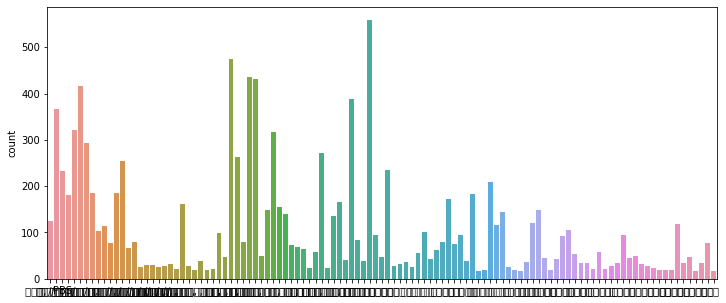

In [10]:
# label 분포
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle = True)

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_to_index = tokenizer.word_index
print(word_to_index)

{'우리': 1, '생각': 2, '사람': 3, '이제': 4, '지금': 5, '가지': 6, '거기': 7, '그냥': 8, '한번': 9, '그게': 10, '그거': 11, '얘기': 12, '요즘': 13, '자기': 14, '시간': 15, '그때': 16, '정도': 17, '보고': 18, '운동': 19, '진짜': 20, '영화': 21, '하나': 22, '조금': 23, '정말': 24, '거지': 25, '때문': 26, '나이': 27, '그것': 28, '다른': 29, '가면': 30, '옛날': 31, '친구': 32, '엄마': 33, '건강': 34, '마음': 35, '계속': 36, '어디': 37, '여행': 38, '음식': 39, '결혼': 40, '우리나라': 41, '처음': 42, '이번': 43, '다음': 44, '운전': 45, '경우': 46, '해도': 47, '기억': 48, '별로': 49, '아이': 50, '항상': 51, '대해': 52, '제일': 53, '사실': 54, '이야기': 55, '부분': 56, '다시': 57, '문제': 58, '요새': 59, '언니': 60, '타고': 61, '당신': 62, '여러': 63, '수도': 64, '걱정': 65, '무슨': 66, '일단': 67, '아침': 68, '저기': 69, '혼자': 70, '거의': 71, '나중': 72, '일본': 73, '아들': 74, '사고': 75, '아주': 76, '생활': 77, '신경': 78, '얼마나': 79, '오늘': 80, '시작': 81, '수가': 82, '가족': 83, '병원': 84, '얼마': 85, '예전': 86, '휴일': 87, '선생님': 88, '십년': 89, '보통': 90, '하루': 91, '러더': 92, '가야': 93, '여기': 94, '다이어트': 95, '자식': 96, '게임': 97, '여름': 98, '자꾸': 99, '공부': 100, 

In [13]:
index_to_word = dict([])
for word, idx in word_to_index.items() :
  index_to_word[idx] = word
print(index_to_word)

{1: '우리', 2: '생각', 3: '사람', 4: '이제', 5: '지금', 6: '가지', 7: '거기', 8: '그냥', 9: '한번', 10: '그게', 11: '그거', 12: '얘기', 13: '요즘', 14: '자기', 15: '시간', 16: '그때', 17: '정도', 18: '보고', 19: '운동', 20: '진짜', 21: '영화', 22: '하나', 23: '조금', 24: '정말', 25: '거지', 26: '때문', 27: '나이', 28: '그것', 29: '다른', 30: '가면', 31: '옛날', 32: '친구', 33: '엄마', 34: '건강', 35: '마음', 36: '계속', 37: '어디', 38: '여행', 39: '음식', 40: '결혼', 41: '우리나라', 42: '처음', 43: '이번', 44: '다음', 45: '운전', 46: '경우', 47: '해도', 48: '기억', 49: '별로', 50: '아이', 51: '항상', 52: '대해', 53: '제일', 54: '사실', 55: '이야기', 56: '부분', 57: '다시', 58: '문제', 59: '요새', 60: '언니', 61: '타고', 62: '당신', 63: '여러', 64: '수도', 65: '걱정', 66: '무슨', 67: '일단', 68: '아침', 69: '저기', 70: '혼자', 71: '거의', 72: '나중', 73: '일본', 74: '아들', 75: '사고', 76: '아주', 77: '생활', 78: '신경', 79: '얼마나', 80: '오늘', 81: '시작', 82: '수가', 83: '가족', 84: '병원', 85: '얼마', 86: '예전', 87: '휴일', 88: '선생님', 89: '십년', 90: '보통', 91: '하루', 92: '러더', 93: '가야', 94: '여기', 95: '다이어트', 96: '자식', 97: '게임', 98: '여름', 99: '자꾸', 100: '공부', 

In [14]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])
print(X_test_encoded[:5])

[[59, 1, 50, 50, 50, 1, 249, 65, 4417, 356, 49, 271, 1963, 73, 90, 2344, 9, 6200, 137, 4, 1, 928, 46, 2053, 294, 177, 46, 1266, 25, 1312, 83, 4265, 2384, 6, 5123, 1365, 2252, 15, 3, 5124, 674, 3370], [1322, 1282, 4266, 789, 75, 9, 191, 75, 45, 394, 231, 6, 16, 48, 1574, 9998, 1964, 231, 1124, 1449, 3775, 1853, 9, 8389], [3, 32, 195, 464, 614, 232, 37, 3040, 349, 410, 208, 349, 5343, 354, 410, 3881, 155, 410, 4132, 5, 442, 461, 552, 36, 461, 7828, 918, 552, 6], [94, 3647, 11065, 2345], [1072, 3371, 22, 221, 1072, 1301, 266, 1, 1072, 621, 9999]]
[[1416, 813, 2792, 112, 887, 241, 172, 8641, 229, 56, 3504, 3, 112, 3, 15, 28, 1112, 118, 3406, 6131, 184, 112, 172, 796, 3, 3, 259, 332, 912, 32, 229, 37, 587, 64, 1591, 5, 796, 91, 36, 5690, 339, 15, 5355, 339, 932, 872, 18, 4, 50, 140, 872, 938, 2136, 677, 4119, 214, 434, 13, 31, 1174, 209, 479, 56, 78, 536, 127, 1289, 386, 1, 1, 249, 538, 815, 1114, 1, 538, 815, 2909, 187, 261, 536, 1006, 536, 872, 1108, 180, 26, 180, 51, 494, 1, 249, 116, 56

In [15]:
target_to_idx = dict([])
count = 0
for i in set(y_train) :
  target_to_idx[i] = count
  count += 1
print(target_to_idx)

{nan: 0, '재테크': 1, '독서': 2, '지인': 3, ' 만화 ': 4, '문학': 5, '국제관계': 6, '친구': 7, '낚시': 8, '골프': 9, '캠핑': 10, '돈': 11, '축구선수': 12, '정신건강': 13, '투병': 14, ' 경제/재태크 ': 15, '여행계획': 16, '축구': 17, '환경': 18, '노후': 19, '직업': 20, '보험': 21, '책': 22, '여행/콘서트': 23, '시사/재테크': 24, '운전면허': 25, '결혼': 26, ' 게임 ': 27, '다이어트': 28, '연애': 29, '술': 30, '분양': 31, '일': 32, '자동차': 33, '여행/자녀 ': 34, '은행': 35, '여행': 36, ' 여행, 지인, 집, 축구, 음식점, 자녀 등 ': 37, '남편': 38, ' 방송/연예 ': 39, '인간관계': 40, '가정': 41, ' 휴일 ': 42, '재태크': 43, '먹거리': 44, '자녀 교육': 45, '드라마': 46, '가족': 47, ' 먹거리 ': 48, '양육/교육': 49, '운전': 50, '건강/교육': 51, ' 건강/다이어트 ': 52, ' 드라마, 영화, 중국 음식, 건강, 쇼핑, 연예인, 영어, 라섹, 두발 자유, 학생 화장, 항공, 은행, 노트북, 커피, 운동 등 ': 53, 'PBS': 54, '야구': 55, '집': 56, '자녀': 57, '일상생활': 58, '자녀직장': 59, '해외여행': 60, '운동선수': 61, '휴양지': 62, ' 영화 ': 63, '건강': 64, '결혼생활': 65, '음식': 66, '일화': 67, '등산': 68, '휴일': 69, '노후준비': 70, '자연/여행': 71, ' 자동차 ': 72, '직장': 73, '요리': 74, '게임': 75, ' 스포츠/레저 ': 76, '스포츠': 77, '자녀교육': 78, '유년시절': 79, '경제': 80, '교육': 81,

In [16]:
idx_to_target = dict([])
for t, idx in target_to_idx.items() :
  idx_to_target[idx] = t
print(idx_to_target)

{0: nan, 1: '재테크', 2: '독서', 3: '지인', 4: ' 만화 ', 5: '문학', 6: '국제관계', 7: '친구', 8: '낚시', 9: '골프', 10: '캠핑', 11: '돈', 12: '축구선수', 13: '정신건강', 14: '투병', 15: ' 경제/재태크 ', 16: '여행계획', 17: '축구', 18: '환경', 19: '노후', 20: '직업', 21: '보험', 22: '책', 23: '여행/콘서트', 24: '시사/재테크', 25: '운전면허', 26: '결혼', 27: ' 게임 ', 28: '다이어트', 29: '연애', 30: '술', 31: '분양', 32: '일', 33: '자동차', 34: '여행/자녀 ', 35: '은행', 36: '여행', 37: ' 여행, 지인, 집, 축구, 음식점, 자녀 등 ', 38: '남편', 39: ' 방송/연예 ', 40: '인간관계', 41: '가정', 42: ' 휴일 ', 43: '재태크', 44: '먹거리', 45: '자녀 교육', 46: '드라마', 47: '가족', 48: ' 먹거리 ', 49: '양육/교육', 50: '운전', 51: '건강/교육', 52: ' 건강/다이어트 ', 53: ' 드라마, 영화, 중국 음식, 건강, 쇼핑, 연예인, 영어, 라섹, 두발 자유, 학생 화장, 항공, 은행, 노트북, 커피, 운동 등 ', 54: 'PBS', 55: '야구', 56: '집', 57: '자녀', 58: '일상생활', 59: '자녀직장', 60: '해외여행', 61: '운동선수', 62: '휴양지', 63: ' 영화 ', 64: '건강', 65: '결혼생활', 66: '음식', 67: '일화', 68: '등산', 69: '휴일', 70: '노후준비', 71: '자연/여행', 72: ' 자동차 ', 73: '직장', 74: '요리', 75: '게임', 76: ' 스포츠/레저 ', 77: '스포츠', 78: '자녀교육', 79: '유년시절', 80: '경제', 81: '교육',

In [17]:
y_train_encoded = [target_to_idx[t] for t in y_train]
y_test_encoded = [target_to_idx[t] for t in y_test]
print(y_train_encoded)
print(y_test_encoded)

[15, 67, 87, 0, 55, 47, 22, 22, 32, 36, 6, 69, 5, 80, 14, 54, 69, 25, 60, 69, 15, 69, 24, 52, 75, 22, 18, 54, 41, 107, 62, 60, 6, 33, 90, 101, 0, 58, 13, 5, 0, 0, 59, 108, 48, 38, 6, 25, 33, 15, 101, 26, 36, 52, 76, 44, 64, 70, 58, 0, 68, 33, 79, 67, 80, 64, 107, 0, 86, 92, 67, 15, 60, 15, 67, 64, 108, 69, 15, 16, 9, 9, 0, 58, 9, 45, 58, 58, 33, 73, 50, 107, 86, 17, 36, 5, 36, 64, 80, 0, 0, 67, 107, 54, 86, 0, 64, 63, 52, 77, 9, 27, 64, 9, 19, 36, 47, 69, 52, 69, 36, 97, 107, 55, 70, 92, 14, 58, 108, 42, 13, 48, 0, 107, 5, 0, 12, 67, 61, 107, 0, 5, 33, 62, 67, 91, 0, 75, 39, 0, 67, 67, 22, 107, 64, 90, 52, 44, 64, 67, 11, 67, 5, 69, 42, 55, 0, 38, 15, 57, 36, 44, 36, 9, 1, 0, 55, 68, 64, 87, 36, 0, 67, 107, 42, 41, 54, 0, 78, 5, 109, 42, 13, 11, 0, 53, 0, 41, 0, 44, 33, 47, 69, 57, 70, 92, 15, 16, 86, 44, 108, 0, 105, 33, 36, 109, 11, 81, 85, 97, 26, 71, 31, 97, 62, 54, 71, 43, 92, 68, 87, 107, 6, 60, 50, 64, 22, 107, 54, 26, 54, 67, 76, 5, 43, 9, 72, 0, 52, 64, 42, 108, 62, 0, 52, 106

X 최대 길이 :  3062
X 평균 길이 :  87.85664854176964


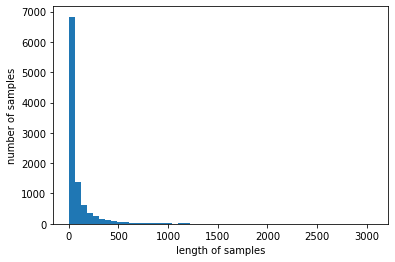

In [18]:
print('X 최대 길이 : ', max(len(w) for w in X_train_encoded))
print('X 평균 길이 : ', sum(map(len, X_train_encoded)) / len(X_train_encoded))

plt.hist([len(sample) for sample in X_train_encoded], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

X 최대 길이 :  1933
X 평균 길이 :  85.20126532226176


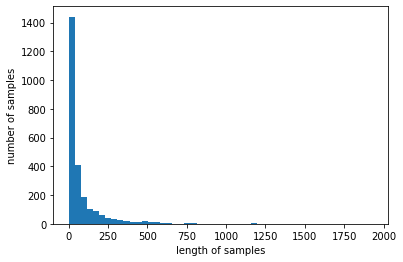

In [19]:
print('X 최대 길이 : ', max(len(w) for w in X_test_encoded))
print('X 평균 길이 : ', sum(map(len, X_test_encoded)) / len(X_test_encoded))
# 제대로 분류되는 최소 대화길이 확인하기
plt.hist([len(sample) for sample in X_test_encoded], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [21]:
def fit_model(max_len, embedding_dim, hidden_units) :
  X_train_pad = pad_sequences(X_train_encoded, maxlen=max_len)
  X_test_pad = pad_sequences(X_test_encoded, maxlen=max_len)

  y_train_pad = to_categorical(y_train_encoded)
  y_test_pad = to_categorical(y_test_encoded)

  vocab_size = len(tokenizer.word_index)
  num_classes = len(target_to_idx)

  model = Sequential()
  model.add(Embedding(vocab_size, embedding_dim))
  model.add(LSTM(hidden_units))
  model.add(Dense(num_classes, activation='softmax'))

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
  mc = ModelCheckpoint('best_model' + str(max_len) + str(embedding_dim) + str(hidden_units) + '.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
  history = model.fit(X_train_pad, y_train_pad, batch_size=128, epochs=30, callbacks=[es, mc], validation_split=0.2)


In [ ]:
"""
vocab_size = len(tokenizer.word_index)
max_len = 60
embedding_dim = 128
hidden_units = 128
num_classes = len(target_to_idx)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_pad, y_train_pad, batch_size=128, epochs=30, callbacks=[es, mc], validation_split=0.2)
"""

In [ ]:
"""
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
"""

In [22]:
candidate_max_len = [60, 80, 100, 120, 140, 160, 180, 200]
candidate_embedding_dims = [32, 64, 128, 256]
candidate_hidden_units = [32, 64, 128, 256]

In [23]:
for i in candidate_max_len :
  for j in candidate_embedding_dims :
    for k in candidate_hidden_units :
      fit_model(i, j, k)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 10/30
62/64 [============================>.] - ETA: 0s - loss: 1.0730 - acc: 0.8237
Epoch 10: val_acc improved from 0.58922 to 0.61246, saving model to best_model14025632.h5
64/64 [==============================] - 1s 17ms/step - loss: 1.0732 - acc: 0.8235 - val_loss: 1.8841 - val_acc: 0.6125
Epoch 11/30
60/64 [===========================>..] - ETA: 0s - loss: 0.8992 - acc: 0.8643
Epoch 11: val_acc improved from 0.61246 to 0.64162, saving model to best_model14025632.h5
64/64 [==============================] - 1s 16ms/step - loss: 0.8963 - acc: 0.8654 - val_loss: 1.7979 - val_acc: 0.6416
Epoch 12/30
63/64 [============================>.] - ETA: 0s - loss: 0.7627 - acc: 0.8893
Epoch 12: val_acc improved from 0.64162 to 0.64558, saving model to best_model14025632.h5
64/64 [==============================] - 1s 17ms/step - loss: 0.7627 - acc: 0.8891 - val_loss: 1.7329 - val_acc: 0.6456
Epoch 13/30
62/64 [============================>.] - ETA: 0s - l

In [29]:
def evaluate_models() :
  candidate_max_len = [60, 80, 100, 120, 140, 160, 180, 200]
  candidate_embedding_dims = [32, 64, 128, 256]
  candidate_hidden_units = [32, 64, 128, 256]
  result = dict([])
  for i in candidate_max_len :
    for j in candidate_embedding_dims :
      for k in candidate_hidden_units :
        model_name = f'best_model{i}{j}{k}.h5'
        model = load_model(model_name)

        X_train_pad = pad_sequences(X_train_encoded, maxlen=i)
        X_test_pad = pad_sequences(X_test_encoded, maxlen=i)
        y_train_pad = to_categorical(y_train_encoded)
        y_test_pad = to_categorical(y_test_encoded)

        res = model.evaluate(X_test_pad, y_test_pad)
        result[f'{i}.{j}.{k}'] = res
  return result

In [30]:
result = evaluate_models()

80/80 [==============================] - 1s 8ms/step - loss: 1.2321 - acc: 0.7477


In [26]:
tmp = [str(i) + ' ' + str(result[i]) + '\n' for i in result)]

SyntaxError: ignored

In [32]:
result

{'60.32.32': [2.1817378997802734, 0.5318307876586914],
 '60.32.64': [2.0046346187591553, 0.5871886014938354],
 '60.32.128': [1.8965080976486206, 0.6113088130950928],
 '60.32.256': [1.9908591508865356, 0.5907473564147949],
 '60.64.32': [1.8658937215805054, 0.6172400116920471],
 '60.64.64': [1.786354422569275, 0.6472914218902588],
 '60.64.128': [1.631347894668579, 0.6524317860603333],
 '60.64.256': [1.6886076927185059, 0.6702253818511963],
 '60.128.32': [1.6326804161071777, 0.6607354879379272],
 '60.128.64': [1.4365891218185425, 0.6982997059822083],
 '60.128.128': [1.4726709127426147, 0.681692361831665],
 '60.128.256': [1.4902087450027466, 0.6769474148750305],
 '60.256.32': [1.5616579055786133, 0.6702253818511963],
 '60.256.64': [1.3900184631347656, 0.7022538781166077],
 '60.256.128': [1.3267918825149536, 0.7125346064567566],
 '60.256.256': [1.3172756433486938, 0.7334914803504944],
 '80.32.32': [2.222979784011841, 0.536180317401886],
 '80.32.64': [1.8819001913070679, 0.6018189191818237],

In [33]:
df = pd.DataFrame()
for i in result :
  df[i] = result[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df.to_csv('change_hyper_parameter.csv')